<a href="https://colab.research.google.com/github/ds4ph-bme/project-2-HerambGupta/blob/main/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The world fatality rate is 0.02061211341740612


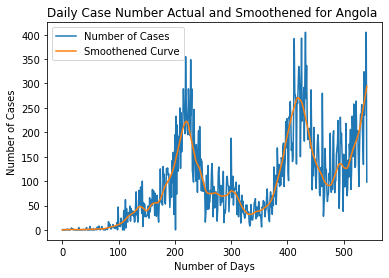

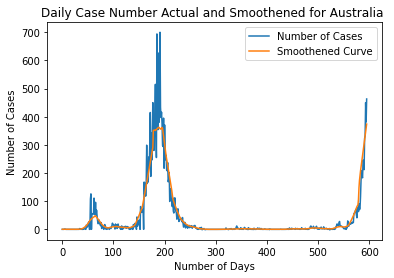

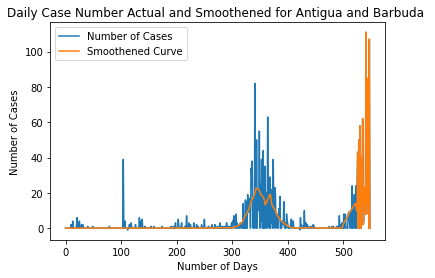

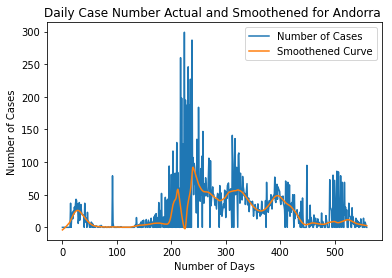

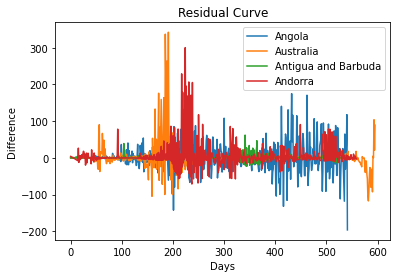

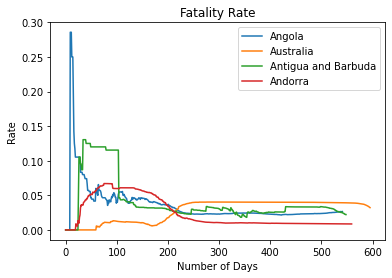

In [1]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

#defining function which calculates and prints the cases per day and the smoothened curve
def graph_daily_smooth(post):
  plt.figure()
  cr=df.iloc[post,]
  dr=death.iloc[post,]
  number=cr[4:]
  death_number=dr[4:]
  n=[0]
  for i in range(len(number)-1):
    if(number[i]!=0):
      nc=number[i+1]-number[i]
      n.append(nc)
  no = len(n)
  t = np.arange(0, no, 1)
  lowess = sm.nonparametric.lowess
  nhat = lowess(n, t, frac=.05,return_sorted=False)
  plt.plot(n)
  plt.plot(nhat)
  plt.title('Daily Case Number Actual and Smoothened for {0} '.format(cr[1]))
  plt.ylabel('Number of Cases')
  plt.xlabel('Number of Days')
  plt.legend(['Number of Cases','Smoothened Curve'])
  return[number,death_number,n,nhat]

e=[]
frr=[]
l_frr=[]
daily_fatatlity_rate=[]
#Hardcoding country positions - can be coded witha random function also
q= [4,14,5,3]

#Storing names of the chosen countries
q_names=[df.iloc[4,1],df.iloc[14,1],df.iloc[5,1],df.iloc[3,1]]
for i in q:
  #calling graph_daily_smooth over the 4 selected countries
  [m_number,m_death_number,m_n,m_nhat]=graph_daily_smooth(i)

  #calculating the residual values and storing it in a list
  e.append(m_n-m_nhat)

  #calculating the fatality rate each day and storing it in a list
  for j in range(len(m_number)):
    if(m_number[j]==0):
      continue
    tfr= m_death_number[j]/m_number[j]
    frr.append(tfr)
  l_frr.append(frr)
  frr=[]

#plotting the residual value curve
plt.figure()
for i in range(4):
  plt.plot(e[i])
plt.title('Residual Curve')
plt.xlabel('Days')
plt.ylabel('Difference')
plt.legend([q_names[0],q_names[1],q_names[2],q_names[3]])

#plotting the fatality rate curve
plt.figure()
for i in range(4):
  plt.plot(l_frr[i])
plt.title('Fatality Rate')
sdf=df.shape[1]-1
sdeath=death.shape[1]-1
plt.legend([q_names[0],q_names[1],q_names[2],q_names[3]])
plt.xlabel('Number of Days')
plt.ylabel('Rate')

#calculating world fatality rate
case_number=df.iloc[:,sdf]
death_number=death.iloc[:,sdeath]

total_case_number=sum(case_number)
total_death_number=sum(death_number)
print
fatality_world= total_death_number/total_case_number

print('The world fatality rate is {0}'.format(fatality_world))


  


